Solve gravity equation using relaxation method. 

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

#constants 
g = 9.8 #gravity
M = 100 # number of time slots
tf = 10 #total amount of time

h = tf/ M # time step to satisfy grid dimensions 

target  = 1e-6 #target acc

#initalize array to save x position
x = np.zeros([M+1],float)
xprime = np.zeros([M+1],float)

The initial differential equation is $g = \frac{dx^2}{d^2t}$


Applying the known equation for second derivatives, we know that $ \frac{dx^2}{d^2t} = \frac{x(t+h) - 2x(t) + x(t-h)}{h^2}$. Combining these two equations, we can solve for $x(t)$, and the relaxation method is applied as a straightforward consequence of it, where the new value of $x(t)$, $x'(t)$ is equal to 

In [15]:
#main loop

delta = 1.0

while delta > target:
    for i in range(1,M):
        if i == 0 or i == M:
            xprime[i] = x[i]  #set by boundary conditions
        else: #going to have to apply jacobi / relaxation method
            xprime[i] = (g*h*h + x[i+1] + x[i-1]) / 2
        #calculate max difference        
        delta = max(abs(x - xprime))
        #swap the two arrays
        
        x[i],xprime[i] = xprime[i],x[i]

Text(0.5, 0, '$t$ (deci-s) ')

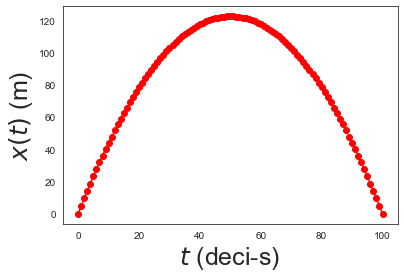

In [20]:
plt.plot(x,'ro--')
plt.ylabel('$x(t) $ (m)',fontsize=25)
plt.xlabel('$t$ (deci-s) ',fontsize=25)

Value of g supposed to be negative? Physical interpretation is always going to be okay but if g is negative so is x(t)? 

In [4]:
x[1]

4.850967437913825

# Initial Velocity Prediction?

In [5]:
v0 = (x[1] - x[0]) / h
vf = (x[-1] - x[-2]) /h

In [6]:
print("The initial velocity of this problem is ", v0)

The initial velocity of this problem is  48.50967437913825


In [7]:
print("The final velocity of this system is ", vf)

The final velocity of this system is  -48.5096897542625
